In [177]:
import numpy as np 
from matplotlib import pyplot as plt
import sympy as sy
import pandas as pd
np.set_printoptions(suppress=True)
from sympy import init_printing
init_printing() 

In [178]:
def translate_matrix(a,b):
    return np.vstack(([1,0,a],[0,1,b],[0,0,1]))

In [179]:
def rotate_matrix(theta):
    m=np.vstack(([np.cos(theta),-np.sin(theta),0],[np.sin(theta),np.cos(theta),0],[0,0,1]))
    for i in range(np.shape(m)[0]):
        for j in range(np.shape(m)[1]):
        if m[i][j]>.00001:
            m[i][j]=0
    return 

IndentationError: expected an indented block (1098067062.py, line 5)

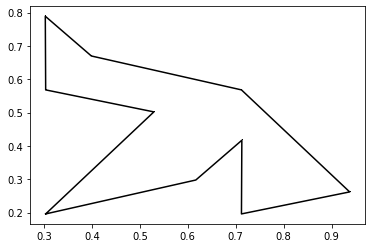

In [189]:
"""Original coordinates 
(0.3036, 0.1960), (0.6168, 0.2977), (0.7128,
0.4169), (0.7120, 0.1960), (0.9377, 0.2620), (0.7120, 0.5680), (0.3989, 0.6697), (0.3028,
0.7889), (0.3036, 0.5680), and (0.5293, 0.5020).
"""

# added last vector to connect first and last point since we will have to transform the added line segment anyways
x=[0.3036,0.6168,0.7128,0.7120,0.9377,0.7120,0.3989,0.3028,0.3036,0.5293,0.3036]
y=[0.1960,0.2977,0.4169,0.1960,0.2620,0.5680,0.6697,0.7889,0.5680,0.5020,0.1960]
#adding a row of 1 to make the matrix compatiable with homogenous transformations
z=11*[1]
#combining the rows into a single matrix: A

A=np.vstack((x,y,z))
#plotting the bird 
plt.plot(A[0],A[1], 'k-,')


To find the matrix of transformation that rotates the bird tile around the point (.7120,.4320) we must first calculate the translation matrix  That moves the tile to the origin from the desired rotation point. : 

 $$\begin{bmatrix}1&0&-.7120\\0&1&-.432\\0&0&1\end{bmatrix}$$
    
 Next we must find the rotation matrix about the z axis for theta = $\pi$: 
 
 $$\begin{bmatrix} \cos(\pi)&-\sin(\pi)&0\\\sin(\pi)&\cos(\pi)&0\\0&0&1\end{bmatrix}\sim \begin{bmatrix}-1&0&0\\0&-1&0\\0&0&1\end{bmatrix}$$
 
 Finally we want to translate the matrix back to the desired point 
  $$\begin{bmatrix}1&0&.7120\\0&1&.432\\0&0&1\end{bmatrix}$$

$$\begin{bmatrix}1&0&.7120\\0&1&.432\\0&0&1\end{bmatrix}\begin{bmatrix}-1&0&0\\0&-1&0\\0&0&1\end{bmatrix}\begin{bmatrix}1&0&-.7120\\0&1&.-432\\0&0&1\end{bmatrix}=\begin{bmatrix}-1&0&1.424\\0&-1&.864\\0&0&1\end{bmatrix}$$

$$T(a,b)R(\pi)T(-a,-b)x$$

In [181]:
def printMatrix(a):
    cm = sns.light_palette("blue", as_cmap=True)
    x=pd.DataFrame(a)
    x=x.style.background_gradient(cmap=cm)
    display(x)

,0,1,2
0,-1.000000,-0.000000,0.712000
1,0.000000,-1.000000,0.432000
2,0.000000,0.000000,1.000000


,0,1,2
0,-1.000000,-0.000000,1.424000
1,0.000000,-1.000000,0.864000
2,0.000000,0.000000,1.000000


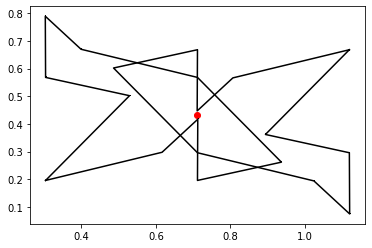

In [188]:
#plot original bird tile
plt.plot(A[0],A[1], 'k-,')
#declare constants 
theta=np.pi
a=.7120
b=.4320
#generate matrices for transformation
t1=translate_matrix(a,b)
r=rotate_matrix(theta)
t2=translate_matrix(-a,-b)



#combine matricies 
T=np.matmul(r,t2)
printMatrix(T)

T=np.matmul(t1,T)
printMatrix(T)

A1=np.matmul(T,A)

#print single rotation point
plt.plot(a,b,'ro') 
#print modified bird (Tile1)
plt.plot(A1[0],A1[1], 'k-,')